# MLP Processing of Movie Overviews

*The following code was reused and extended from the work at: * https://github.com/fchollet/keras/blob/master/examples/reuters_mlp.py

### Import the necessary libraries.

In [1]:
from __future__ import print_function
 
import pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text

Using TensorFlow backend.


### Configure settings.

In [2]:
max_words = 10000
batch_size = 32
epochs = 50

### Load the prepared datasets.

In [3]:
print('Loading data...')

with open('full_dataset.pickle', 'rb') as handle:
    dataset = pickle.load(handle)
    
print(len(dataset['train_x']), 'train sequences')
print(len(dataset['test_x']), 'test sequences')
 
num_classes = len(dataset['labels'])
print(num_classes, 'classes.')

print('Data loaded.')

Loading data...
5120 train sequences
1704 test sequences
8 classes.
Data loaded.


### Tokenize the text for use.

In [4]:
tokenizer = text.Tokenizer(num_words=max_words, lower=True, split=" ")
full_corpus = dataset['full_data']['overview'].astype(str)
tokenizer.fit_on_texts(full_corpus)

In [5]:
train_texts = dataset['train_x']['overview'].astype(str)
test_texts = dataset['test_x']['overview'].astype(str)

train_tfidf_matrix = tokenizer.texts_to_matrix(train_texts, mode='tfidf')
train_binary_matrix = tokenizer.texts_to_matrix(train_texts, mode='binary')

test_tfidf_matrix = tokenizer.texts_to_matrix(test_texts, mode='tfidf')
test_binary_matrix = tokenizer.texts_to_matrix(test_texts, mode='binary')

print(train_tfidf_matrix.shape)
print(test_tfidf_matrix.shape)

(5120, 10000)
(1704, 10000)


### Build a MLP Neural Net for Multilabel Text Classification

In [6]:
print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Building model...


### Fit the Model.

In [7]:
history = model.fit(train_binary_matrix, dataset['train_y'],
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Train on 4096 samples, validate on 1024 samples
Epoch 1/50
4096/4096 [==============================] - 13s - loss: 2.8835 - acc: 0.4126 - val_loss: 2.6230 - val_acc: 0.5195
Epoch 2/50
4096/4096 [==============================] - 13s - loss: 2.1001 - acc: 0.6157 - val_loss: 2.4770 - val_acc: 0.5059
Epoch 3/50
4096/4096 [==============================] - 13s - loss: 1.7317 - acc: 0.6580 - val_loss: 2.5888 - val_acc: 0.4834
Epoch 4/50
4096/4096 [==============================] - 13s - loss: 1.6044 - acc: 0.6594 - val_loss: 2.5542 - val_acc: 0.5176
Epoch 5/50
4096/4096 [==============================] - 13s - loss: 1.5430 - acc: 0.6626 - val_loss: 2.5828 - val_acc: 0.5137
Epoch 6/50
4096/4096 [==============================] - 13s - loss: 1.4881 - acc: 0.6663 - val_loss: 2.6256 - val_acc: 0.5088
Epoch 7/50
4096/4096 [==============================] - 13s - loss: 1.4485 - acc: 0.6655 - val_loss: 2.6731 - val_acc: 0.5215
Epoch 8/50
4096/4096 [==============================] - 13s - loss: 1.

In [8]:
score = model.evaluate(test_binary_matrix, dataset['test_y'],
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1600/1704 [===========================>..] - ETA: 0sTest score: 3.26033946494
Test accuracy: 0.49882629108


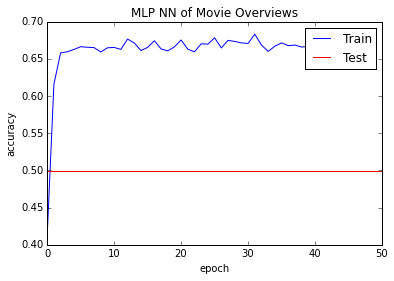

In [9]:
plt.plot(history.history['acc'], label="Train")
plt.axhline(y=score[1], color='r', label="Test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("MLP NN of Movie Overviews");

In [10]:
train_probabilities = model.predict_proba(train_binary_matrix)
test_probabilities = model.predict_proba(test_binary_matrix)

1600/1704 [===========================>..] - ETA: 0s

In [11]:
dataset['MLP_Overview_Train_Probabilities'] = train_probabilities
dataset['MLP_Overview_Test_Probabilities'] = test_probabilities

In [12]:
with open('full_dataset.pickle', 'wb') as handle:
    pickle.dump(dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)